In [183]:
#importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [184]:
ewa= pd.read_excel("EastWestAirlines.xlsx",sheet_name = 'data')

In [185]:
ewa

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# Hierarchical Clustering


In [186]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [187]:
trans =MinMaxScaler()
trans_ewa = trans.fit_transform(ewa)

In [188]:
trans_ewa

array([[0.00000000e+00, 1.65077268e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.43742464e-01, 0.00000000e+00],
       [2.48756219e-04, 1.12878760e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.39884254e-01, 0.00000000e+00],
       [4.97512438e-04, 2.42568502e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.47841813e-01, 0.00000000e+00],
       ...,
       [9.99502488e-01, 4.31694976e-02, 0.00000000e+00, ...,
        0.00000000e+00, 1.68796721e-01, 1.00000000e+00],
       [9.99751244e-01, 3.22018866e-02, 0.00000000e+00, ...,
        1.88679245e-02, 1.68676151e-01, 0.00000000e+00],
       [1.00000000e+00, 1.76908304e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.68314444e-01, 0.00000000e+00]])

In [189]:
#here all the data will be conveted into x-scores
trans1 = StandardScaler()
trans1_ewa = trans1.fit_transform(ewa)
trans1_ewa

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

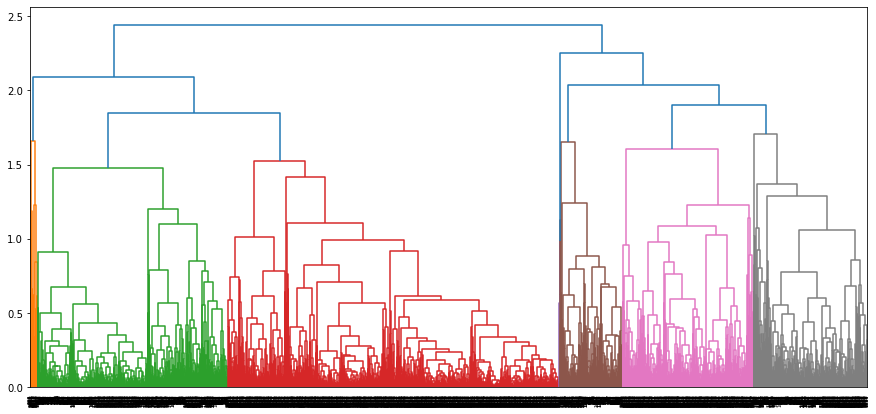

In [190]:
#Creating Dendrogram
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z=linkage(trans_ewa, method="complete",metric="euclidean")
plt.figure(figsize=(15,7))
dendogram = sch.dendrogram(z)
plt.show()

In [191]:
import warnings 
warnings.filterwarnings('ignore')
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=5,linkage = 'complete',affinity="euclidean").fit(trans_ewa)
cluster_labels = pd.Series(h_complete.labels_)
cluster_labels
ewa['clust'] = cluster_labels
ewa

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [192]:
data = ewa[(ewa.clust==1)]

In [193]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,1
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,1
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [194]:
data = ewa[(ewa.clust==3)]

In [195]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
198,202,8669,0,1,3,1,11397,16,0,0,7486,1,3
226,230,117329,0,1,2,1,6448,11,0,0,7416,1,3
381,386,167670,0,1,3,1,15907,13,0,0,6994,0,3
392,398,11189,0,1,2,1,9044,20,0,0,8296,1,3
561,568,380930,0,2,2,1,22485,25,213,1,6539,1,3
794,804,55610,0,1,2,1,5095,13,0,0,6151,0,3
940,951,44824,0,1,3,1,21107,19,2000,4,5916,1,3
1149,1161,84856,0,1,2,1,6894,13,0,0,5547,0,3
1270,1283,16103,0,1,3,1,10819,13,0,0,5427,0,3
1383,1397,18154,0,1,2,1,7748,16,0,0,5310,1,3


In [196]:
data = ewa[(ewa.clust==2)]

In [197]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
2015,2032,53232,888,4,1,1,80696,65,22100,45,3831,1,2
3235,3257,287033,0,1,1,1,26161,58,12873,53,2272,1,2
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,2
3594,3617,27619,0,4,1,1,83726,68,14050,46,1325,1,2


In [198]:
data = ewa[(ewa.clust==4)]

In [199]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,4
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,4
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,4
18,19,91473,0,3,1,1,27408,17,0,0,6903,1,4
19,20,23354,0,3,1,1,10447,5,0,0,6896,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,1638,194949,0,1,1,1,10121,13,4621,10,4930,1,4
1667,1683,25688,2396,1,1,1,3103,10,0,0,4754,1,4
1669,1685,288379,0,1,1,1,15942,8,1442,5,4741,1,4
1698,1714,192108,1000,1,1,1,10200,3,200,2,4656,1,4


In [200]:
data = ewa[(ewa.clust==0)]

In [201]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,0
16,17,51890,0,4,1,1,48963,16,0,0,6910,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,0
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0


In [202]:
ewa.iloc[:,1:].groupby(ewa.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,,
0,90920.413174,176.971771,2.994867,1.005988,1.021386,33532.760479,16.643285,772.680924,2.332763,4151.118905,1.000000,0.0
1,59971.432010,88.480947,1.712395,1.000401,1.008825,10215.097473,9.096270,227.057361,0.653028,3823.422383,0.000000,1.0
2,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000,2.0
3,55387.685714,28.571429,1.028571,2.428571,1.000000,14254.571429,16.342857,398.657143,1.771429,4139.228571,0.285714,3.0
4,121041.607383,491.486577,1.409396,1.000000,1.006711,10519.322148,11.456376,928.362416,2.949664,6483.204698,1.000000,4.0


# KMeans Clustering

In [203]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [204]:
km_ewa=pd.read_excel('EastWestAirlines.xlsx',sheet_name = 'data')

In [205]:
km_ewa

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [206]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
trans_df = trans.fit_transform(ewa)
trans_df

array([[0.00000000e+00, 1.65077268e-02, 0.00000000e+00, ...,
        8.43742464e-01, 0.00000000e+00, 2.50000000e-01],
       [2.48756219e-04, 1.12878760e-02, 0.00000000e+00, ...,
        8.39884254e-01, 0.00000000e+00, 2.50000000e-01],
       [4.97512438e-04, 2.42568502e-02, 0.00000000e+00, ...,
        8.47841813e-01, 0.00000000e+00, 2.50000000e-01],
       ...,
       [9.99502488e-01, 4.31694976e-02, 0.00000000e+00, ...,
        1.68796721e-01, 1.00000000e+00, 0.00000000e+00],
       [9.99751244e-01, 3.22018866e-02, 0.00000000e+00, ...,
        1.68676151e-01, 0.00000000e+00, 2.50000000e-01],
       [1.00000000e+00, 1.76908304e-03, 0.00000000e+00, ...,
        1.68314444e-01, 0.00000000e+00, 2.50000000e-01]])

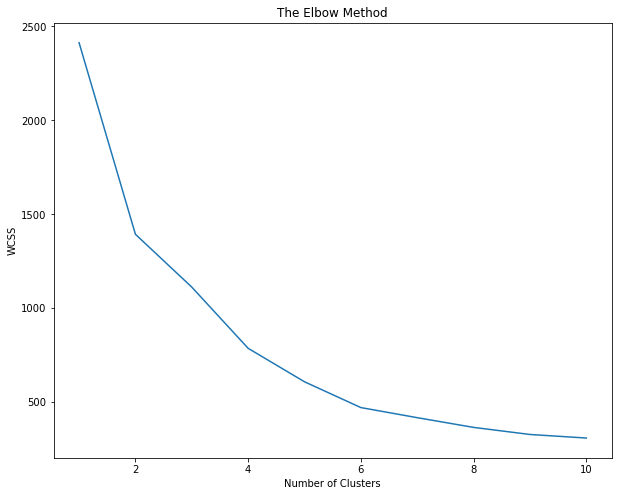

In [207]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1,11):
    clf = KMeans(n_clusters=i)
    clf.fit(trans_df)
    WCSS.append(clf.inertia_)#inerita is another name for WCSS and all the calculations are done in background
plt.plot(range(1,11),WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()
    

In [208]:
#From above elbow curve we can observe there are 6 clusters

In [209]:
clf = KMeans(n_clusters=6)
y_Kmeans = clf.fit_predict(trans_df)

In [231]:
y_Kmeans

array([1, 1, 1, ..., 4, 2, 2])

In [232]:
clf.labels_

array([1, 1, 1, ..., 4, 2, 2])

In [211]:
#finding what are the cluster centers
clf.cluster_centers_

array([[ 3.45455552e-01,  6.94410435e-02,  1.46435614e-02,
         7.84976153e-01,  7.94912560e-04,  9.93640700e-03,
         1.97414883e-01,  2.45406145e-01,  2.68690608e-02,
         4.70948196e-02,  6.30056282e-01,  1.00000000e+00,
         1.58982512e-03],
       [ 2.90790550e-01,  2.91376543e-02,  8.10185185e-03,
         2.95138889e-02,  8.68055556e-03,  2.89351852e-04,
         1.28416894e-02,  7.93496985e-02,  7.85524975e-03,
         1.35831586e-02,  6.71431797e-01,  1.27675648e-15,
         2.56365741e-01],
       [ 8.00672157e-01,  2.07560121e-02,  8.48674749e-03,
         5.10801080e-02,  8.55085509e-03,  1.57515752e-03,
         1.66900176e-02,  8.07150482e-02,  6.95356553e-03,
         1.12935822e-02,  2.38959138e-01,  4.77395901e-15,
         2.56300630e-01],
       [ 1.75840764e-01,  7.03148045e-02,  4.29472528e-02,
         9.98376623e-02,  2.59740260e-02,  1.62337662e-03,
         4.12064991e-02,  1.37458472e-01,  3.02218711e-02,
         5.67262926e-02,  7.78078505e

In [212]:
#used to tell what is WCSS
clf.inertia_

471.034234676361

In [213]:
md = pd.Series(y_Kmeans)
km_ewa['clust'] = md
km_ewa

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,4
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [214]:
ewa.groupby(ewa.clust).mean() 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,,
0,2014.272027,90920.413174,176.971771,2.994867,1.005988,1.021386,33532.760479,16.643285,772.680924,2.332763,4151.118905,1.000000
1,2170.906137,59971.432010,88.480947,1.712395,1.000401,1.008825,10215.097473,9.096270,227.057361,0.653028,3823.422383,0.000000
2,3128.000000,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
3,2113.857143,55387.685714,28.571429,1.028571,2.428571,1.000000,14254.571429,16.342857,398.657143,1.771429,4139.228571,0.285714
4,684.607383,121041.607383,491.486577,1.409396,1.000000,1.006711,10519.322148,11.456376,928.362416,2.949664,6483.204698,1.000000


Text(0.5, 1.0, 'Kmeans Clustering')

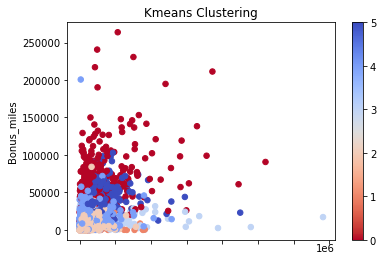

In [215]:
km_ewa.plot(x="Balance",y = "Bonus_miles",c=clf.labels_,kind = "scatter",s = 30,cmap=plt.cm.coolwarm_r)
plt.title('Kmeans Clustering')

In [216]:
WCSS

[2413.1826742966277,
 1393.426245105594,
 1112.2296032621118,
 786.4196921240018,
 608.3184533783021,
 471.03423467636094,
 417.30715579698506,
 365.58608832182364,
 327.86997212050926,
 308.96607691718714]

# DBSCAN

In [217]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [218]:
db=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')

In [219]:
db

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [220]:
array=db.values

In [221]:
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [222]:
#conveting the data into z-scores
stsscalar =StandardScaler().fit(array)
X = stsscalar.transform(array)
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [223]:
#fitting the DBSCAN model
dbscan = DBSCAN(eps=0.475, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.475)

In [224]:
#Noisy values are implies -1
dbscan.labels_

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

In [225]:
c1 = pd.DataFrame(dbscan.labels_,columns=['cluster'])
c1

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,4
3995,-1
3996,-1
3997,0


In [226]:
df = pd.concat([db,c1],axis=1)
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,4
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,-1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,-1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


Text(0.5, 1.0, 'Clusters using DBSCAN')

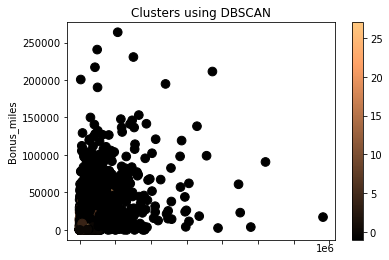

In [227]:
import matplotlib.pyplot as plt
df.plot(x="Balance",y="Bonus_miles", c=dbscan.labels_,kind="scatter", s=75,cmap=plt.cm.copper)
plt.title("Clusters using DBSCAN")

In [228]:
dbscan.labels_

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

In [234]:
import sklearn
sklearn.metrics.silhouette_score(X, y_Kmeans)

0.20862490857687424

In [235]:
#here after compairing with 3 methods we can say that Hierarchy method is best